<a href="https://colab.research.google.com/github/Glassesoh/AdvCodingWinter/blob/main/ukraine_water_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from numpy import array
from keras.models import Sequential
import keras.layers
def sequence(arr, step):
  x,y= list(), list()
  for i in range (len(arr)):
    end=i+step
    if end>len(arr)-1:
      break
    seq_x, seq_y = arr[i:end],arr[end]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)


raw_data=[10,20,30,40,50,60,70,80,90]
step=4
x,y=sequence(raw_data, step)
for i in range (len(x)):
  print(x[i],y[i])

ft=1
sq=2
step=2
x=x.reshape((x.shape[0],sq,step,ft))


[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90


In [12]:
from keras import layers
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
model=Sequential()
model.add(TimeDistributed(Conv1D(filters=64,kernel_size=1,activation='relu'),input_shape=(None,step,ft)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),input_shape=(None,step,ft)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(x,y,epochs=300, verbose=0)
x_input=array([60,70,80,90])
x_input=x_input.reshape(1,sq,step,ft)
result=model.predict(x_input,verbose=0)
print(result)


[[102.24096]]


In [13]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_23 (TimeD  (None, None, 2, 64)       128       
 istributed)                                                     
                                                                 
 time_distributed_24 (TimeD  (None, None, 1, 64)       0         
 istributed)                                                     
                                                                 
 time_distributed_25 (TimeD  (None, None, 1, 64)       4160      
 istributed)                                                     
                                                                 
 time_distributed_26 (TimeD  (None, None, 64)          0         
 istributed)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)               

In [ ]:
"""
with open('/content/Untitled spreadsheet - dist 1.csv') as fn:
  all_line = fn.readlines()
  new_all_line = []
  for line in all_line:
    if len(line) != 5:
      line = line.split(',')
      new_line = []
      for ele in line:
        if '\n' in ele:
          ele = ele[:-1]

        new_line.append(float(ele))
    new_all_line.append(new_line)
"""
ukraine_test=[18.28,11.88675,10.899,9.109,9.325,10.705,10.705,10.596,9.459]

x = [[0.0305,0.0295,0.03275,0.01975,0.012,0.0305,0.039,0.0295,0.0265,0.047],
             [0.0405,0.04025,0.1465,0.02525,0.03,0.0235,0.05325,0.05075,0.07475,0.02125],
             [0.07425,0.06375,0.0595,0.09,0.13875,0.04425,0.09425,0.0765,0.15,0.0855],
             [0.06625,0.07175,0.061,0.05525,0.04575,0.074,0.08875,0.07525,0.18125,0.0545]
             ]
x_both = [[0.0305,0.0295,0.03275,0.01975,0.012,0.0305,0.039,0.0295,0.0265,0.047],
             [0.0405,0.04025,0.1465,0.02525,0.03,0.0235,0.05325,0.05075,0.07475,0.02125],
             [0.07425,0.06375,0.0595,0.09,0.13875,0.04425,0.09425,0.0765,0.15,0.0855],
             [0.06625,0.07175,0.061,0.05525,0.04575,0.074,0.08875,0.07525,0.18125,0.0545],
             [0.05225,0.04575,0.05425,0.02325,0.036,0.0395,0.05725,0.04625,0.039,0.04825],
             [0.05025,0.0245,0.04575,0.01625,0.0135,0.032,0.02175,0.0245,0.0405,0.012],
             [0.03325,0.0365,0.07075,0.0125,0.0855,0.024,0.035,0.03875,0.041,0.03125],
             [0.0395,0.0255,0.02525,0.025,0.022,0.02675,0.04575,0.03225,0.03175,0.018675]
             ]
sum=1+2
x=np.array(x_both)
#print(x.index([0.0305,0.0295,0.03275,0.01975,0.012,0.0305,0.039,0.0295,0.0265,0.047]))
"""
for i in range(4):
  for j in range((int)(len(x[i-1])/sum)):

    value_x=np.append(j-1,np.array([x[i-1][j*sum],x[i-1][j*sum+1],x[i-1][j*sum+2]]))
    split(value_x,2,1)
    tempx,y =np.array(split(x[i-1],2,1))
    x_dataset=np.append(i-1,np.array(tempx))
    y_dataset=np.append(i-1,np.array(y))

x_dataset = np.array(x_dataset)
y_dataset = np.array(y_dataset)
"""

cnt=0
x_dataset = []
y_dataset = []
for lines in x_both:
  for i in range(len(lines)-2):
    x_dataset.append(np.array([lines[i],lines[i+1]]))
    y_dataset.append(np.array([lines[i+2]]))
print(x_dataset)
print(y_dataset)
x_dataset = np.array(x_dataset)
y_dataset = np.array(y_dataset)
print(x_dataset.shape)
print(y_dataset.shape)

[array([0.0305, 0.0295]), array([0.0295 , 0.03275]), array([0.03275, 0.01975]), array([0.01975, 0.012  ]), array([0.012 , 0.0305]), array([0.0305, 0.039 ]), array([0.039 , 0.0295]), array([0.0295, 0.0265]), array([0.0405 , 0.04025]), array([0.04025, 0.1465 ]), array([0.1465 , 0.02525]), array([0.02525, 0.03   ]), array([0.03  , 0.0235]), array([0.0235 , 0.05325]), array([0.05325, 0.05075]), array([0.05075, 0.07475]), array([0.07425, 0.06375]), array([0.06375, 0.0595 ]), array([0.0595, 0.09  ]), array([0.09   , 0.13875]), array([0.13875, 0.04425]), array([0.04425, 0.09425]), array([0.09425, 0.0765 ]), array([0.0765, 0.15  ]), array([0.06625, 0.07175]), array([0.07175, 0.061  ]), array([0.061  , 0.05525]), array([0.05525, 0.04575]), array([0.04575, 0.074  ]), array([0.074  , 0.08875]), array([0.08875, 0.07525]), array([0.07525, 0.18125]), array([0.05225, 0.04575]), array([0.04575, 0.05425]), array([0.05425, 0.02325]), array([0.02325, 0.036  ]), array([0.036 , 0.0395]), array([0.0395 , 0.

In [ ]:
print(x_dataset.shape)

(64, 2)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_dataset,y_dataset,test_size = 0.1)

In [ ]:
x = layers.Input(2,) ###
h = layers.Embedding(20000, 128)(x)
h = layers.LSTM(128)(h)
y = layers.Dense(1, activation='sigmoid')(h)

model = models.Model(x,y)
x_train.shape

(57, 2)

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adam',
)
model.compile(adam,'mse')
history= model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
2/2 [==============================] - 3s 596ms/step - loss: 0.1735 - val_loss: 0.1732
Epoch 2/10
2/2 [==============================] - 0s 57ms/step - loss: 0.1719 - val_loss: 0.1716
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: 0.1702 - val_loss: 0.1699
Epoch 4/10
2/2 [==============================] - 0s 60ms/step - loss: 0.1686 - val_loss: 0.1683
Epoch 5/10
2/2 [==============================] - 0s 59ms/step - loss: 0.1670 - val_loss: 0.1666
Epoch 6/10
2/2 [==============================] - 0s 67ms/step - loss: 0.1653 - val_loss: 0.1649
Epoch 7/10
2/2 [==============================] - 0s 58ms/step - loss: 0.1636 - val_loss: 0.1632
Epoch 8/10
2/2 [==============================] - 0s 59ms/step - loss: 0.1619 - val_loss: 0.1615
Epoch 9/10
2/2 [==============================] - 0s 61ms/step - loss: 0.1602 - val_loss: 0.1597
Epoch 10/10
2/2 [==============================] - 0s 58ms/step - loss: 0.1584 - val_loss: 0.1579


In [ ]:
model.predict([[0.0405,0.04025]])

array([[0.44417837]], dtype=float32)

In [ ]:
from keras import utils

In [ ]:
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 embedding_6 (Embedding)     (None, 2, 128)            2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['loss', 'val_loss'])


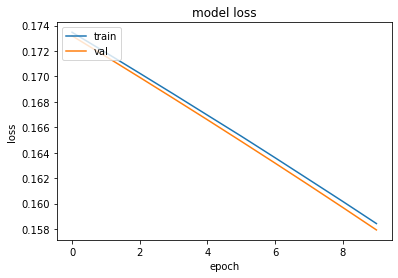

In [ ]:
print(history.history.keys())
#  "Accuracy"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()